In [1]:
from rbm import *

from sklearn import datasets
import numpy as np
import pandas as pd

from sklearn import preprocessing

In [2]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target

In [3]:
# scale the dataset - unless you want to compute the
# variance mean (say for GMM models??)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)

In [11]:
gb_rbm = BernoulliRBM(2, n_iter=1000)
gb_rbm

BernoulliRBM(batch_size=10, learning_rate=0.1, n_components=2, n_iter=1000,
       random_state=None, verbose=0)

In [12]:
gb_rbm.fit(X_scaled)
rbm_feats = gb_rbm.transform(X_scaled)

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
from ggplot import *

rbm_df = pd.DataFrame(rbm_feats)

In [15]:
rbm_df.columns = ['feat{}'.format(x) for x in rbm_df.columns]
rbm_df['response'] = [str(x) for x in Y]

In [26]:
rbm_df.tail()

,feat0,feat1,response
145,0.0,0.0,2
146,0.0,0.0,2
147,0.0,0.0,2
148,0.0,0.0,2
149,0.0,0.0,2


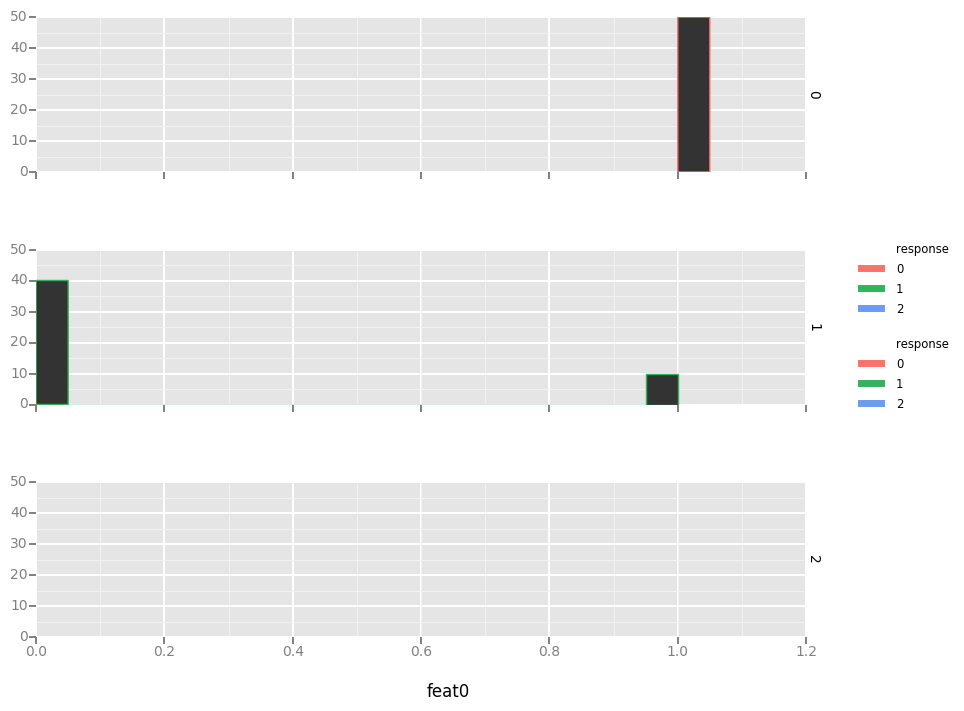

<ggplot: (-9223371911855430298)>

In [25]:
ggplot(rbm_df, aes(x='feat0', fill='response', color='response')) + geom_histogram(binwidth=0.05) + facet_grid('response')

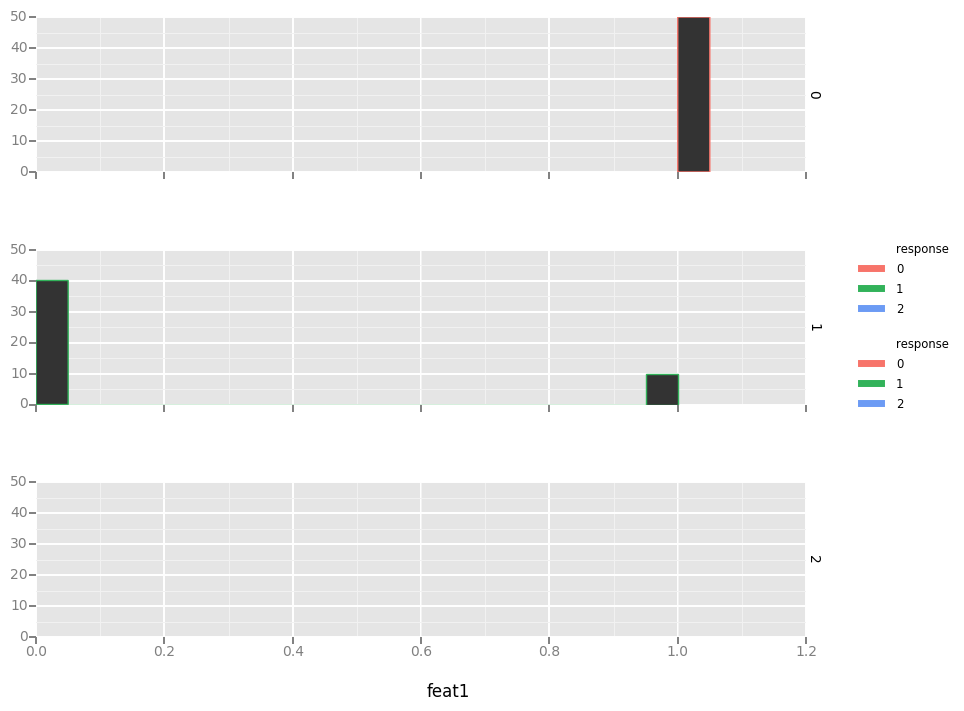

<ggplot: (125000052800)>

In [27]:
ggplot(rbm_df, aes(x='feat1', fill='response', color='response')) + geom_histogram(binwidth=0.05) + facet_grid('response')